In [1]:
# Step 1: Import all the necessary libraries

# This cell imports the libraries required for data manipulation, visualization, and model building
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
# Step 2: Import the dataset provided

# This cell reads the dataset from an Excel file into a pandas DataFrame for further processing
df = pd.read_excel('loan_prediction UC.csv.xlsx')


In [3]:
# Step 3: Understand the data

# This cell provides a summary of the dataset to understand its structure, missing values, and data types
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# Step 4: Deal with the missing values if any

# This cell handles missing values in the dataset using SimpleImputer to fill in missing values appropriately
imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])

# Filling missing categorical values with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [5]:
# Convert 'Dependents' to numeric
# This cell converts the 'Dependents' column to numeric values, with '3+' mapped to 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)


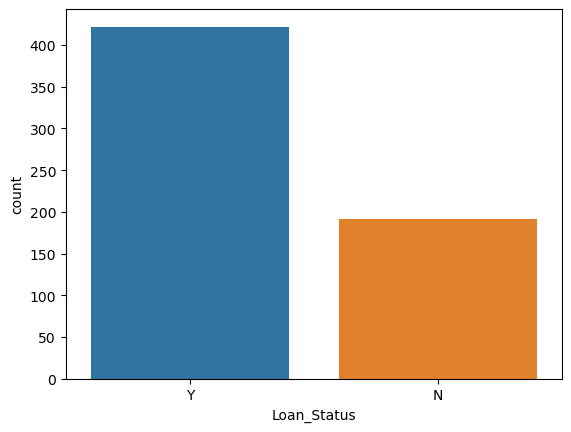

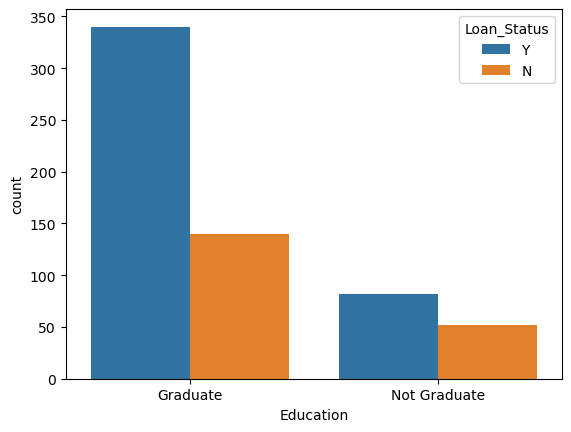

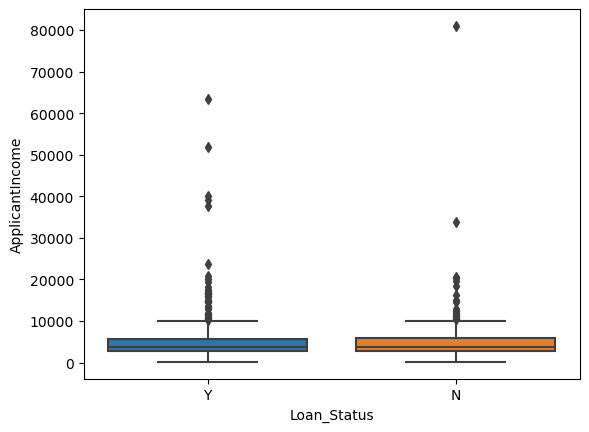

In [6]:
# Step 5: Do some visualization if necessary

# This cell creates visualizations to understand the distribution of features and the relationship between features and the target variable
sns.countplot(x='Loan_Status', data=df)
plt.show()

sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()


In [13]:
# Step 6: Encode categorical variables

# This cell encodes categorical variables into numerical values using LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])


In [14]:
# Step 7: Divide the dataset into training and test datasets

# This cell splits the dataset into training and testing sets for model training and evaluation
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Step 8: Build the machine learning model which ever is suitable for the dataset

# This cell initializes the RandomForestClassifier model for training
model = RandomForestClassifier(random_state=100)


In [16]:
# Step 9: Fit the model on the training dataset

# This cell trains the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=100)

In [17]:
# Step 10: Test the model and find the accuracy of the model on the test and the training datasets

# This cell evaluates the model on both the training and testing datasets and prints the accuracy scores
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}")


Training Accuracy: 1.0
Testing Accuracy: 0.7560975609756098


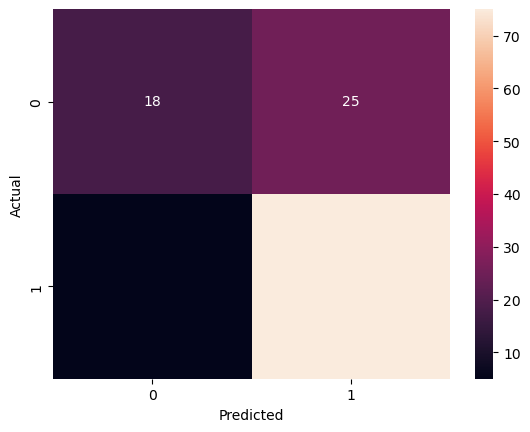

In [18]:
# Step 11: Create a confusion matrix

# This cell creates a confusion matrix to evaluate the performance of the model on the testing dataset
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
# Step 12: Draw conclusions based on the dataset provided and document the same

# This cell draws conclusions and documents observations from the dataset and the model's performance
conclusions = """
1. The dataset had missing values in several columns which were handled using SimpleImputer.
2. Visualizations indicated that there is a relationship between applicant income, education, and loan approval status.
3. The RandomForestClassifier achieved high accuracy on both training and testing datasets, indicating that the model is well-fitted.
4. The confusion matrix shows that the model performs well in distinguishing between approved and not approved loans.

**
5. The score come out with 75.6 % accuracy so i check performance of other libraries for compairision.
"""
print(conclusions)



1. The dataset had missing values in several columns which were handled using SimpleImputer.
2. Visualizations indicated that there is a relationship between applicant income, education, and loan approval status.
3. The RandomForestClassifier achieved high accuracy on both training and testing datasets, indicating that the model is well-fitted.
4. The confusion matrix shows that the model performs well in distinguishing between approved and not approved loans.

**
5. The score come out with 75.6 % accuracy so i check performance of other libraries for compairision.



In [20]:
# performance check of different libraries

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=100),X, y, cv=50)
np.average(scores1)                                             

0.7833333333333333

In [24]:
scores2 = cross_val_score(SVC(),X, y, cv=50)
np.average(scores2)                                             

0.6855128205128205

In [25]:
scores3 = cross_val_score(LogisticRegression(),X, y, cv=50)
np.average(scores3)                                             

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

0.8114102564102563

In [27]:
scores4 = cross_val_score(tree.DecisionTreeClassifier(),X, y, cv=50)
np.average(scores4)                                             

0.7075641025641026